# Image Processing

This code load the first image in a specified directory, then let the user select one or more region for which it computes the sum of all internal pixels. The sums are computed for all the images in the directory and all the selected regions. The results are then plotted thanks to the matplotlib package.

In [1]:
import argparse
import cv2
import imutils
import numpy as np
import os

#Set the path for the image to be opened
path = r'C:\Users\lucag\Desktop\Images\1.jpg'
#Open the image
image = cv2.imread(path)

#Get image dimensions
(h, w, d) = image.shape # getting image dimensions (height, width, depth, a.k.a. channels)
print("width={}, height={}, depth={}".format(w, h, d))

#Get the three channel values for a single pixel
(B, G, R) = image[100, 50]
print("R={}, G={}, B={}".format(R, G, B))

#Resize the image keeping the aspect ratio
new_width = 100.0
r = new_width / w
dim = (int(new_width), int(h * r))
resized = cv2.resize(image, dim)
cv2.imshow("Aspect Ratio Resize", resized)

#OR, with imutils
resized = imutils.resize(image, width=300)
cv2.imshow("Imutils Resize", resized)

#Blur the image to reduce noise
blurred = cv2.GaussianBlur(image, (11, 11), 0)
cv2.imshow("Blurred", blurred)

#Draw a rectangle
output = image.copy()
tl_vertex = (20, 160)
br_vertex = (40, 60)
bl_vertex = (tl_vertex[0], br_vertex[1])
tr_vertex = (br_vertex[0], tl_vertex[1])

cv2.rectangle(output, tl_vertex, br_vertex, (0, 0, 255), 2) #(source_image, top left corner, bottom right corner, color, thickness)
cv2.imshow("Rectangle", output)

#convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray", gray)

GR = gray[100, 50]

integral = np.sum(gray[bl_vertex[1]:tl_vertex[1], bl_vertex[0]:br_vertex[0]]) #y1:y2, x1:x2
print("GR={}".format(GR))
print("Integral={}".format(integral))

cv2.imshow("image", image)
cv2.waitKey(0)

width=743, height=594, depth=3
R=24, G=21, B=16
GR=21
Integral=34368


-1

Select the background box
Is the number of rectangles to be catched fixed? y -> yes    any other key -> No
y
Insert the number of rectangles to be catched: 2


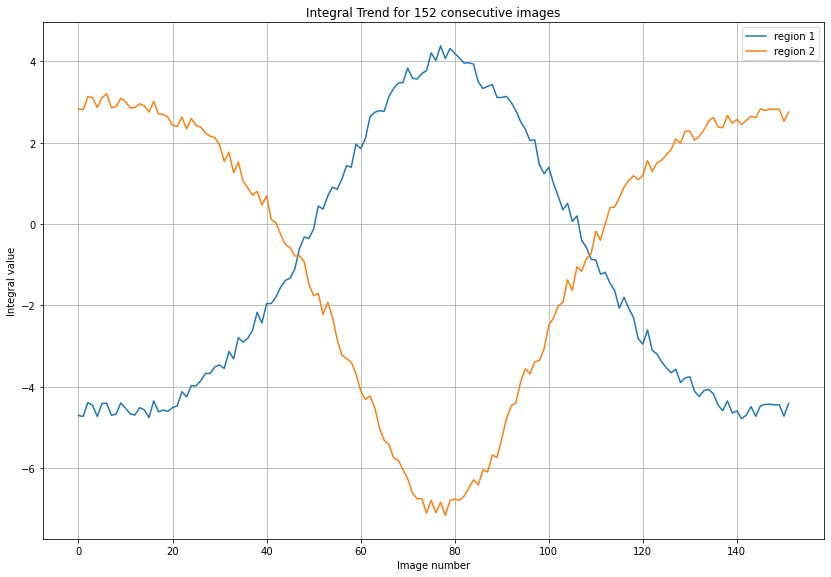

In [2]:
import sys
import os
import argparse
import cv2
import imutils
import numpy as np
import imutils
import copy
import matplotlib.pyplot as plt
import datetime
username = 'PC' # 'admin' for BO1 lab
sys.path.append('c:/users/'+ username +'/miniconda3/lib/site-packages')
path_to_selectinwindow = './MyCustomPackage/opencvdragrect-master' # relative path to the MyCustomPackage folder 
sys.path.append(path_to_selectinwindow)
import selectinwindow

now = datetime.datetime.now()

# Lists to store the bounding box coordinates
top_left_corner=[]
bottom_right_corner=[]
top_left_corner_guess = () 
bottom_right_corner_guess = ()
click=0
wName = "Select region"

#Set the path for the image to be opened
#path = r'C:\Users\lucag\Desktop\Actual_Images\Sweep_dof_input5_10V_10mA_058_21102021_155858_375.png'
directory = r'C:\Users\lucag\Desktop\Images_from_gif'
path = directory + r'\frame_000_delay-0.08s.png'

#Open the image
image = cv2.imread(path)

#convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#OR, with imutils
gray = imutils.resize(gray, width=1080)

def mousePoints(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(x,y)
        
def drawRectangle(action, x, y, flags, *userdata):
    # Referencing global variables 
    global top_left_corner, bottom_right_corner, top_left_corner_guess, bottom_right_corner_guess, click
    
    # Mark the top left corner when left mouse button is pressed
    if action == cv2.EVENT_LBUTTONDOWN and click == 0:
        top_left_corner_guess = (x,y)
        click = 1
    
    # When left mouse button is released, mark bottom right corner
    elif action == cv2.EVENT_LBUTTONDOWN and click == 1:
        bottom_right_corner_guess = (x,y)
        click = 0
        #if top left corner is instead bottom left corner and bottom right is top right, i.e. if top left corner's y > bottom right corner's y
        if top_left_corner_guess[1] > bottom_right_corner_guess[1] and top_left_corner_guess[0] < bottom_right_corner_guess[1]:
            top_left_corner = (top_left_corner_guess[0],bottom_right_corner_guess[1])
            bottom_right_corner = (bottom_right_corner_guess[0],top_left_corner_guess[1])
        #if top left corner is instead top right corner and bottom right is bottom left, i.e. if 
        elif top_left_corner_guess[1] < bottom_right_corner_guess[1] and top_left_corner_guess[0] > bottom_right_corner_guess[0]: 
            top_left_corner = (bottom_right_corner_guess[0],top_left_corner_guess[1])
            bottom_right_corner = (top_left_corner_guess[0],bottom_right_corner_guess[1])
        #if top left corner is instead bottom right corner and bottom right corner is top left, i.e. if 
        elif top_left_corner_guess[1] > bottom_right_corner_guess[1] and top_left_corner_guess[0] > bottom_right_corner_guess[0]: 
            top_left_corner = (bottom_right_corner_guess[0],bottom_right_corner_guess[1])
            bottom_right_corner = (top_left_corner_guess[0],top_left_corner_guess[1])
        else:
            top_left_corner = (top_left_corner_guess[0],top_left_corner_guess[1])
            bottom_right_corner = (bottom_right_corner_guess[0],bottom_right_corner_guess[1])
        
        cv2.rectangle(gray, top_left_corner, bottom_right_corner, (255,255,255),2, 8)
        cv2.imshow(wName,gray)

# Defining function to draw rectangle
def catch_rectangle(gray,wName):

    """
    The function take as input the image the rectangle has to be catched on.
    The First defines the first vertex, the second click defines the opposite vertex.
    The image is closed when the user presses the "q" key
    """

    cv2.imshow(wName, gray)
    click=0
    
    # highgui function called when mouse events occur
    cv2.setMouseCallback(wName, drawRectangle)

    k=0
    
    # Close the window when key q is pressed
    while k!=113:
        # Display the image
        #cv2.imshow(wName, gray)
        k = cv2.waitKey(0)
        
    cv2.destroyAllWindows()
    
    width = bottom_right_corner[0] - top_left_corner[0]
    height = bottom_right_corner[1] - top_left_corner[1]
    
    rectangle = {"top left corner":top_left_corner, "bottom right corner":bottom_right_corner, "width":width, "height":height}
    click = 0
    return rectangle
    
    
# ask if number of rectangles to be catched is already known
rectangles = []

print("Select the background box")
background_box = catch_rectangle(gray,"select background box")
background_offset = np.sum(gray[background_box["top left corner"][1]:background_box["bottom right corner"][1] , \
                                       background_box["top left corner"][0]:background_box["bottom right corner"][0]])/(background_box["width"]*background_box["height"]) 

fixed_number = input("Is the number of rectangles to be catched fixed? y -> yes    any other key -> No\n")
if fixed_number == "y":
    number_of_rectangles = int(input("Insert the number of rectangles to be catched: "))
    # CALL THAT MANY TIMES THE CATCH_RECTANGLE FUNCTION
    for i in range(number_of_rectangles):
        rectangles.append(catch_rectangle(gray,str(i)))
    
else: # START CALLING THE CATCH_RECTANGLE FUNCTION UNTIL THE USER STOP IT
    repeat = "y"
    while repeat == "y":
        # CALL THE CATCH_RECTANGLE FUNCTION
        rectangles.append(catch_rectangle(gray, str(i)))
        repeat = input("Do you want to insert catch another rectangle? y -> yes    any other key -> No\n")
    
#rectI = catch_rectangle(gray)

#Set the directory containing the images to be opened
#directory = r'C:\Users\lucag\Desktop\Actual_Images' #Images


integral = [[] for i in range(len(rectangles))] # integral is a list of the given number of rectangles. 
                                                # The length of each rectangle is equal to the number of images to be processed.

# Sequentially open each image -------------------------------------

for i in os.listdir(directory): 
    
    image = cv2.imread(directory + "/" + i)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Resizing the image
    gray = imutils.resize(gray, width=1080)
    output = gray.copy()
    
    for k in range(len(rectangles)):

        # Computing the sum of pixel values inside the selected rectangle and normalizing it by the rectangle area and subtracting the background
        integral[k].append(np.sum(gray[rectangles[k]["top left corner"][1]:rectangles[k]["bottom right corner"][1] , \
                                       rectangles[k]["top left corner"][0]:rectangles[k]["bottom right corner"][0]]\
                                 )/(rectangles[k]["width"]*rectangles[k]["height"])-background_offset)   #y1:y2, x1:x2  
        
        #print("Integral={}".format(integral))
        #print("Image shape: height -> " + str(gray.shape[0]) + " and width -> " + str(gray.shape[1]))

        top_left_corner[0], bottom_right_corner[0], (0,255,0),2, 8
        
        #Draw a rectangle #CONTROLLA SE IL PRIMO PUNTO è IL VERTICE SINISTRO SUPERIORE O INFERIORE (IF COORD Y DEL PRIMO PUNTO >= DI COORD Y PUNTO FINALE O NO)

        
        #print("Dragged rectangle coordinates")
        #print("Top left vertex: ({},{}), Bottom left vertex: ({},{}), Top right vertex: ({},{}), Bottom right vertex: ({},{})" \
        #      .format(tl_vertex[0],tl_vertex[1],bl_vertex[0],bl_vertex[1],tr_vertex[0],tr_vertex[1],br_vertex[0],br_vertex[1]))

        cv2.rectangle(output, rectangles[k]["top left corner"], rectangles[k]["bottom right corner"], (255, 255, 255), 2) #(source_image, top left corner, bottom right corner, color, thickness)

    
    cv2.imshow("Rectangle", output)
    cv2.waitKey(100)  

# -----------------------------------------------------------    

    
#Plotting the integral ----------------------------

data_figure = plt.figure("Integrals")
data_figure.set_size_inches(14, 9.5, forward=True)
data_plot = data_figure.add_subplot(111)

for i in range(len(integral)): # plot integral values for each rectangle
    data_plot.plot(integral[i], label= "region " + str(i+1))
data_plot.legend()
    
data_plot.set_xlabel('Image number')
data_plot.set_ylabel('Integral value')
data_plot.set_title('Integral Trend for ' + str(len(integral[0])) + ' consecutive images')
data_plot.grid(True)
#plt.xticks(range(len(integral)))
#data_plot.tight_layout()
timestamp = now.strftime("%d_%m_%Y_%H_%M_%S")
plt.savefig("C:/Users/lucag/Desktop/Figures/" + timestamp + ".png")
plt.show()


# -----------------------------------------------------------


# close all open windows
cv2.destroyAllWindows()